<a href="https://colab.research.google.com/github/anmar36a/Data-Analysis/blob/main/Temperature_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive

# Load files

In [ ]:
drive.mount('/content/drive')
data_dir = '/content/drive/My Drive/Codigo/climate/berkeley'
os.chdir(data_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
global_temps = pd.read_csv('GlobalTemperatures.csv')
country_temps = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

# Describe datasets

In [ ]:
print(global_temps.shape)
print(global_temps.columns.tolist())
print(global_temps.head())
print(global_temps.describe())

(3192, 9)
['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty', 'LandMaxTemperature', 'LandMaxTemperatureUncertainty', 'LandMinTemperature', 'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperatureUncertainty']
           dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                         

In [ ]:
print(f'NULL values: \n {global_temps.isnull().sum()}')
print(f'NA values: \n {global_temps.isna().sum()}')
print(f'INF values: \n {np.isinf(global_temps["LandAverageTemperature"]).any()}')

NULL values: 
 dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64
NA values: 
 dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64
INF values: 
 False


In [ ]:
print(country_temps.shape)
print(country_temps.columns.tolist())
print(country_temps.head())
print(country_temps.describe())

(577462, 4)
['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country']
           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland
       AverageTemperature  AverageTemperatureUncertainty
count       544811.000000                  545550.000000
mean            17.193354                       1.019057
std             10.953966                       1.201930
min            -37.658000                       0.052000
25%             10.025000                       0.323000
50%             20.901000                       0.571000
75%             25.814000                       1.206000
max             38.84

# Some basic visualizations

## Temperatures per year

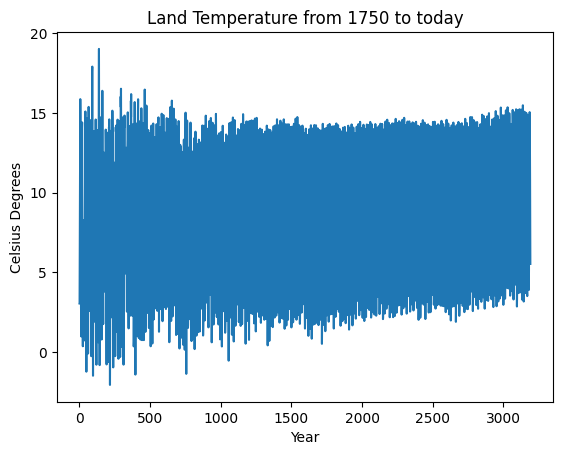

In [ ]:
# Plot of historical Land Average Temperatures
sns.lineplot(global_temps['LandAverageTemperature'])

plt.ylabel('Celsius Degrees')
plt.xlabel('Year')
plt.title('Land Temperature from 1750 to today')
plt.show()

In [ ]:
# Plot of yearly Land Average Temperatures
global_temps['year'] = global_temps['dt'].apply(lambda x: int(x[:4]))

yearly_temps_dict = {}
first_year = int(global_temps.at[0, 'dt'][:4])
last_year = int(global_temps.iat[-1, 0][:4])

In [ ]:
for i in range(first_year, last_year):
    temps = global_temps.loc[global_temps['year'] == i, 'LandAverageTemperature']
    yearly_temps_dict[i] = temps.mean()

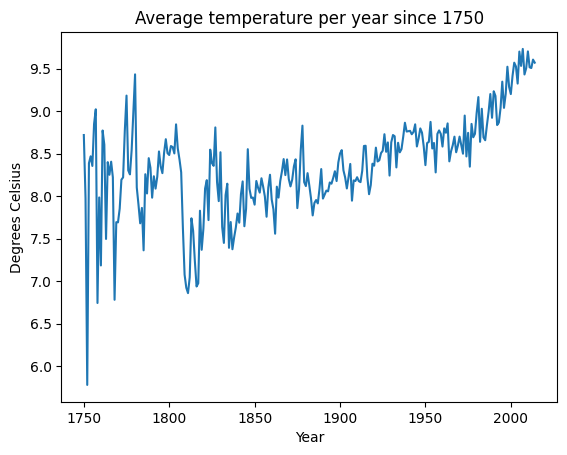

In [ ]:
sns.lineplot(yearly_temps_dict)

plt.title('Average temperature per year since 1750')
plt.ylabel('Degrees Celsius')
plt.xlabel('Year')
plt.show()

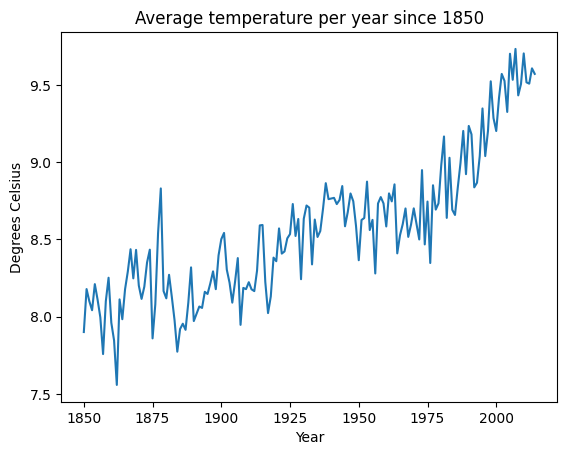

In [ ]:
# Plot yearly average temperatures since 1850

years = []
temperatures = []

for i in range(1850, 2015):
    years.append(i)
    temperatures.append(yearly_temps_dict[i])

sns.lineplot(x = years, y = temperatures)

plt.title('Average temperature per year since 1850')
plt.ylabel('Degrees Celsius')
plt.xlabel('Year')
plt.show()

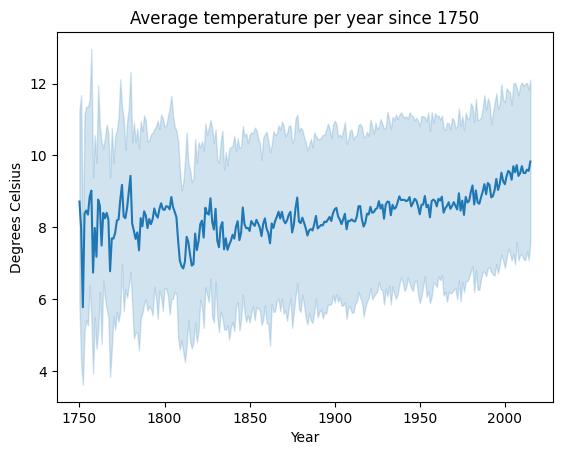

In [ ]:
sns.lineplot(data=global_temps, x="year", y="LandAverageTemperature")

plt.title('Average temperature per year since 1750')
plt.ylabel('Degrees Celsius')
plt.xlabel('Year')
plt.show()

## Temperatures per decade

In [ ]:
# Plot average temperature per decade since 1750
global_temps['decade'] = global_temps['dt'].apply(lambda x: int(x[:3])*10)

decade_temps_dict = {}
first_decade = 175
last_decade = 201

for i in range(first_decade, last_decade):
    temps = global_temps.loc[global_temps['decade'] == i*10, 'LandAverageTemperature']
    decade_temps_dict[i*10] = temps.mean()

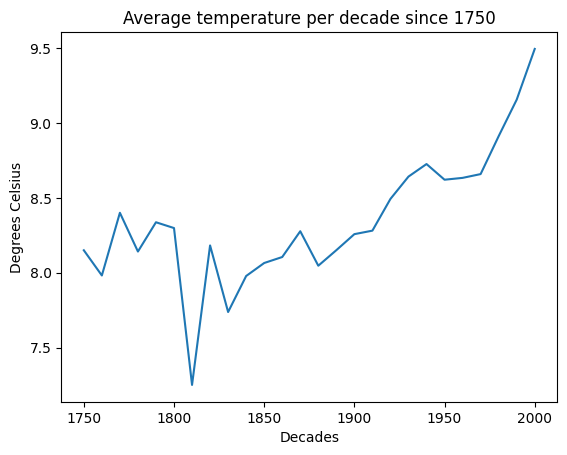

In [ ]:
sns.lineplot(decade_temps_dict)

plt.title('Average temperature per decade since 1750')
plt.ylabel('Degrees Celsius')
plt.xlabel('Decades')
plt.show()

In [ ]:
years = list(yearly_temps_dict.keys())
temps = list(yearly_temps_dict.values())
decades = []
for i in range(first_year,last_year):
    decades.append(int(i/10)*10)

decade_temps_dict2 = {'decade': decades, 'years': years, 'Degrees Celsius': temps}
decade_temps = pd.DataFrame(decade_temps_dict2)
decade_temps.head()

,decade,years,Degrees Celsius
0,1750,1750,8.719364
1,1750,1751,7.976143
2,1750,1752,5.779833
3,1750,1753,8.388083
4,1750,1754,8.469333


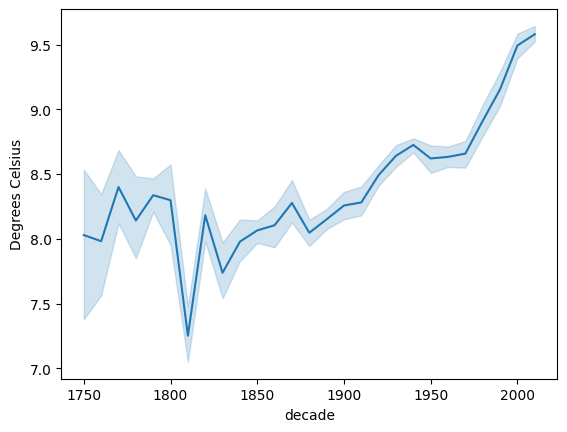

In [ ]:
sns.lineplot(decade_temps, x='decade', y='Degrees Celsius')

plt.show()

## Difference between Ocean and Land

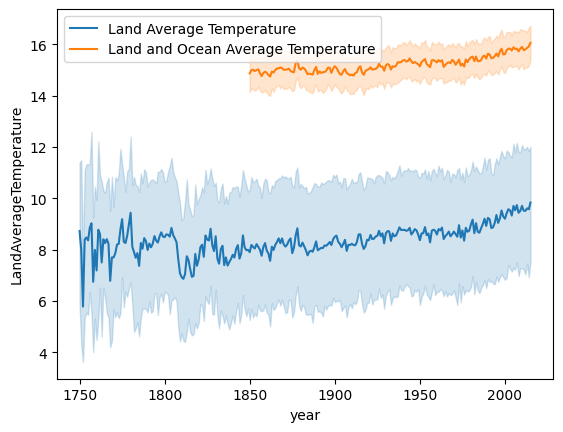

In [ ]:
# Plot Land and Ocean temperatures
sns.lineplot(global_temps, x='year', y='LandAverageTemperature', label='Land Average Temperature')
sns.lineplot(global_temps, x='year', y='LandAndOceanAverageTemperature', label='Land and Ocean Average Temperature')
plt.legend(loc='upper left')
plt.show()

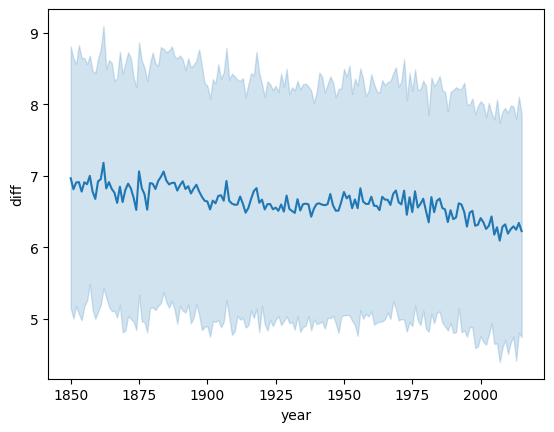

In [ ]:
# Plot the difference between both temperatures accross the years
global_temps['diff'] = global_temps['LandAndOceanAverageTemperature'] - global_temps['LandAverageTemperature']

sns.lineplot(data=global_temps, x='year', y='diff')
plt.show()

# Countries Dataset

In [ ]:
country_temps.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')

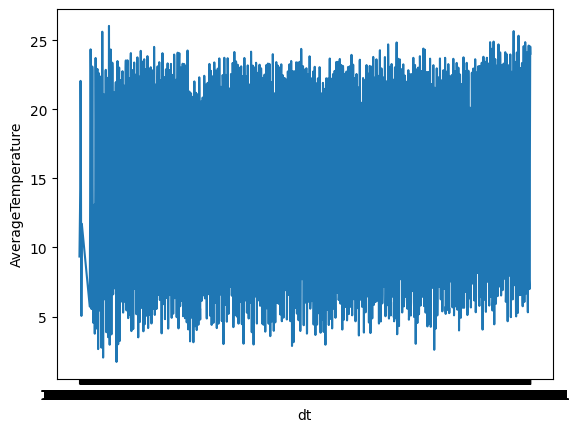

In [ ]:
# Plot Spain temperature
spain_temps = country_temps[country_temps['Country'] == 'Spain']

sns.lineplot(spain_temps, x='dt', y ='AverageTemperature')

plt.show()

# Preguntas interesantes

* ¿Ha aumentado la diferencia entre los momento más fríos y más cálidos del año?
* ¿

# Conclusiones interesantes


*   La temperatura del mar podría haber aumentado menos que la terrestre
*   List item

